# Tutorial on MCMC

In [8]:
# normal imports
import numpy as np
import matplotlib.pyplot as plt

# emcee related imports
import emcee

# modules that I wrote
import sys
sys.path.insert(0,"..") # this is so it can find pendulum_sbi
from pendulum_sbi.pendulum import pendulum

Set this to True if you want to run the MCMC, set it to False if you want to load an MCMC you already ran

In [2]:
run = False
# This is where the saved MCMC will live:
filename = "MCMC_chains/chain_normal_prior.h5"

## Demonstrate how the pendulum class works and what its attributes are

In [18]:
theta_o = np.array([10, 5, np.pi/4])
time =  np.linspace(0, 10, 100)
noise = [0.1, 0.0, 0.0]

# pendulum object
swing = pendulum(theta_o, time, noise)
print(f'x positions of pendulum with initial parameters $\theta$ = {theta_o}', swing.simulate_x())


x positions of pendulum with initial parameters $	heta$ = [10.          5.          0.78539816] [[ 3.53553391  3.50747374  3.42070801  3.27373528  3.06971781  2.8010503
   2.44158243  2.08385038  1.59266029  1.12122972  0.52242973 -0.02881692
  -0.61062692 -1.09133985 -1.6049511  -2.0388225  -2.48372058 -2.82000313
  -3.11426069 -3.31594154 -3.42626663 -3.50598989 -3.53523092 -3.50814974
  -3.42114714 -3.27581081 -3.10161474 -2.73545258 -2.51658666 -2.00558661
  -1.60022016 -1.04177687 -0.54979677 -0.02234526  0.59368492  1.17102544
   1.69648295  1.98967987  2.53450539  2.77747257  3.04619277  3.31404394
   3.43689199  3.50764119  3.52925505  3.51434033  3.41030175  3.29717453
   3.09177274  2.7946173   2.35516728  2.04078167  1.94012337  1.01747857
   0.620468    0.24401277 -0.56919147 -1.460838   -1.65551984 -1.95271662
  -2.34030413 -2.84527414 -3.05832606 -3.11117441 -3.46821429 -3.49816891
  -3.53548255 -3.52289882 -3.43924018 -3.22437544 -3.01539668 -2.66579083
  -2.21836103 -1.

Now, plot several realizations of the pendulum object:

offset g value is 5.0
offset g value is 7.5
offset g value is 10.0
offset g value is 12.5
offset g value is 15.0


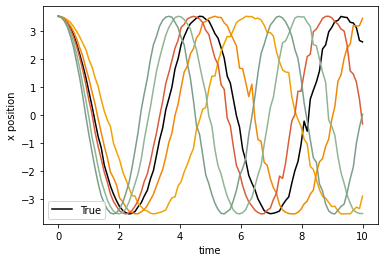

In [13]:
theta_o = np.array([9, 5, np.pi/4])
true_position = pendulum(theta_o, time, noise).simulate_x()

plt.clf()
plt.plot(time, true_position.flatten(), color = 'black', label = 'True')

color_list = ['#F0A202','#F18805','#D95D39','#90B494','#7B9E89']
for i, offset_gs in enumerate(np.linspace(5,15,5)):
    print(f'offset g value is {offset_gs}')
    theta = np.array([offset_gs, 5, np.pi/4])
    
    offset_position = pendulum(theta, time, noise).simulate_x()
    plt.plot(time, offset_position.flatten(), color = color_list[i])
    #plt.annotate(f'log L = {round(log_likelihood(theta, time, true_position, yerr = 1),2)}, g = {round(offset_gs, 2)}', 
    #    xy = (0.02, 0.3 - 0.05*i), xycoords = 'axes fraction', color = color_list[i])
plt.xlabel('time')
plt.ylabel('x position')
plt.legend()
plt.show()